In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
#Create an empty array to sort and organize data from multiple files

dates=pd.date_range(start="1961-03-01",end="2017-02-28",freq="D")
comp=pd.DataFrame(index=dates)
comp.index.name='Date'
print(comp)

Empty DataFrame
Columns: []
Index: [1961-03-01 00:00:00, 1961-03-02 00:00:00, 1961-03-03 00:00:00, 1961-03-04 00:00:00, 1961-03-05 00:00:00, 1961-03-06 00:00:00, 1961-03-07 00:00:00, 1961-03-08 00:00:00, 1961-03-09 00:00:00, 1961-03-10 00:00:00, 1961-03-11 00:00:00, 1961-03-12 00:00:00, 1961-03-13 00:00:00, 1961-03-14 00:00:00, 1961-03-15 00:00:00, 1961-03-16 00:00:00, 1961-03-17 00:00:00, 1961-03-18 00:00:00, 1961-03-19 00:00:00, 1961-03-20 00:00:00, 1961-03-21 00:00:00, 1961-03-22 00:00:00, 1961-03-23 00:00:00, 1961-03-24 00:00:00, 1961-03-25 00:00:00, 1961-03-26 00:00:00, 1961-03-27 00:00:00, 1961-03-28 00:00:00, 1961-03-29 00:00:00, 1961-03-30 00:00:00, 1961-03-31 00:00:00, 1961-04-01 00:00:00, 1961-04-02 00:00:00, 1961-04-03 00:00:00, 1961-04-04 00:00:00, 1961-04-05 00:00:00, 1961-04-06 00:00:00, 1961-04-07 00:00:00, 1961-04-08 00:00:00, 1961-04-09 00:00:00, 1961-04-10 00:00:00, 1961-04-11 00:00:00, 1961-04-12 00:00:00, 1961-04-13 00:00:00, 1961-04-14 00:00:00, 1961-04-15 00:00:00

In [8]:
flow=pd.read_csv('streamflow.csv',parse_dates=['Date'])
flow_wide=flow.pivot(index='Date',columns='Watershed',values='Flow (L/s)').add_suffix('SF')
print(flow_wide)

Watershed   S1SF  S2SF  S4SF  S5SF  S6SF
Date                                    
1961-03-01   0.0  0.00   NaN   NaN   NaN
1961-03-02   0.0  0.00   NaN   NaN   NaN
1961-03-03   0.0  0.00   NaN   NaN   NaN
1961-03-04   0.0  0.00   NaN   NaN   NaN
1961-03-05   0.0  0.00   NaN   NaN   NaN
...          ...   ...   ...   ...   ...
2017-02-24   NaN  1.38  1.43  1.26  0.73
2017-02-25   NaN  1.09  0.48  0.92  0.75
2017-02-26   NaN  1.08  0.29  1.68  0.69
2017-02-27   NaN  0.54  0.02  1.71  0.56
2017-02-28   NaN  0.54  0.02  1.71  0.56

[20454 rows x 5 columns]


In [9]:
comp=comp.join(flow_wide)
print(comp)

            S1SF  S2SF  S4SF  S5SF  S6SF
Date                                    
1961-03-01   0.0  0.00   NaN   NaN   NaN
1961-03-02   0.0  0.00   NaN   NaN   NaN
1961-03-03   0.0  0.00   NaN   NaN   NaN
1961-03-04   0.0  0.00   NaN   NaN   NaN
1961-03-05   0.0  0.00   NaN   NaN   NaN
...          ...   ...   ...   ...   ...
2017-02-24   NaN  1.38  1.43  1.26  0.73
2017-02-25   NaN  1.09  0.48  0.92  0.75
2017-02-26   NaN  1.08  0.29  1.68  0.69
2017-02-27   NaN  0.54  0.02  1.71  0.56
2017-02-28   NaN  0.54  0.02  1.71  0.56

[20454 rows x 5 columns]


In [12]:
wte=pd.read_csv('WTE.csv',parse_dates=['DATE'])
wte=wte.set_index('DATE').rename_axis('Date').reset_index()

wte_wide=wte.pivot(index='Date',columns='PEATLAND',values='WTE').add_suffix('WTE')
print(wte_wide)

PEATLAND     S1WTE   S2WTE   S3WTE   S4WTE   S5WTE   S6WTE
Date                                                      
1961-01-01  411.94  421.89     NaN     NaN     NaN     NaN
1961-01-02  411.94  421.89     NaN     NaN     NaN     NaN
1961-01-03  411.94  421.88     NaN     NaN     NaN     NaN
1961-01-04  411.94  421.88     NaN     NaN     NaN     NaN
1961-01-05  411.94  421.88     NaN     NaN     NaN     NaN
...            ...     ...     ...     ...     ...     ...
2020-12-27  412.15  421.88  413.66  428.50  423.49  422.68
2020-12-28  412.15  421.87  413.66  428.50  423.49  422.68
2020-12-29  412.15  421.87  413.66  428.50  423.49  422.68
2020-12-30  412.15  421.87  413.66  428.50  423.48  422.68
2020-12-31  412.14  421.87  413.66  428.49  423.48  422.68

[21915 rows x 6 columns]


In [13]:
comp=comp.join(wte_wide)
print(comp)

            S1SF  S2SF  S4SF  S5SF  S6SF   S1WTE   S2WTE   S3WTE   S4WTE  \
Date                                                                       
1961-03-01   0.0  0.00   NaN   NaN   NaN  411.47  421.64     NaN     NaN   
1961-03-02   0.0  0.00   NaN   NaN   NaN  411.47  421.63     NaN     NaN   
1961-03-03   0.0  0.00   NaN   NaN   NaN  411.47  421.63     NaN     NaN   
1961-03-04   0.0  0.00   NaN   NaN   NaN  411.46  421.63     NaN     NaN   
1961-03-05   0.0  0.00   NaN   NaN   NaN  411.46  421.63     NaN     NaN   
...          ...   ...   ...   ...   ...     ...     ...     ...     ...   
2017-02-24   NaN  1.38  1.43  1.26  0.73  412.21  421.97  413.65  428.58   
2017-02-25   NaN  1.09  0.48  0.92  0.75  412.21  421.96  413.64  428.58   
2017-02-26   NaN  1.08  0.29  1.68  0.69  412.21  421.96  413.64  428.58   
2017-02-27   NaN  0.54  0.02  1.71  0.56  412.21  421.95  413.64  428.58   
2017-02-28   NaN  0.54  0.02  1.71  0.56  412.21  421.94  413.64  428.58   

           

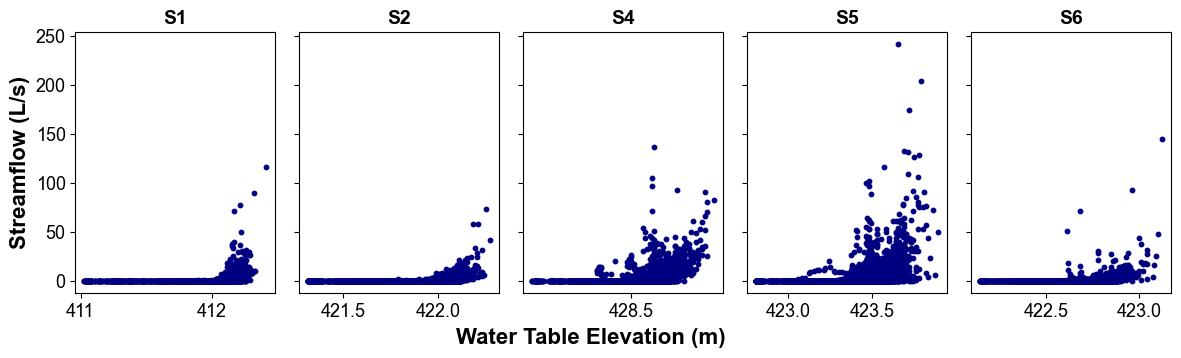

In [68]:
#Now to graph WTE vs Streamflow

from matplotlib.ticker import MultipleLocator

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 13

fig,axes=plt.subplots(nrows=1,ncols=5,figsize=(12, 3.5),sharey=True)

mask=comp[['S1SF','S1WTE']].notna().all(axis=1)
axes[0].scatter(comp.loc[mask,'S1WTE'],comp.loc[mask,'S1SF'],s=10, color='navy')
#axes[0].set_xlabel('Water table elevation (m)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Streamflow (L/s)', fontsize=16, fontweight='bold')
axes[0].set_title('S1',fontsize=14, fontweight='bold')

mask=comp[['S2SF','S2WTE']].notna().all(axis=1)
axes[1].scatter(comp.loc[mask,'S2WTE'],comp.loc[mask,'S2SF'],s=10, color='navy')
#axes[1].set_xlabel('Water table elevation (m)', fontsize=12, fontweight='bold')
axes[1].set_title('S2',fontsize=14, fontweight='bold')

mask=comp[['S4SF','S4WTE']].notna().all(axis=1)
axes[2].scatter(comp.loc[mask,'S4WTE'],comp.loc[mask,'S4SF'],s=10, color='navy')
axes[2].xaxis.set_major_locator(MultipleLocator(0.5))
#axes[2].set_xlabel('Water table elevation (m)', fontsize=12, fontweight='bold')
#axes[2].set_ylabel('Streamflow (L/s)', fontsize=12, fontweight='bold')
axes[2].set_title('S4',fontsize=14, fontweight='bold')

mask=comp[['S5SF','S5WTE']].notna().all(axis=1)
axes[3].scatter(comp.loc[mask,'S5WTE'],comp.loc[mask,'S5SF'],s=10, color='navy')
#axes[3].set_xlabel('Water table elevation (m)', fontsize=12, fontweight='bold')
#axes[3].set_ylabel('Streamflow (L/s)', fontsize=12, fontweight='bold')
axes[3].set_title('S5',fontsize=14, fontweight='bold')

mask=comp[['S6SF','S6WTE']].notna().all(axis=1)
axes[4].scatter(comp.loc[mask,'S6WTE'],comp.loc[mask,'S6SF'],c='navy',s=10)
#axes[4].set_xlabel('Water table elevation (m)', fontsize=12, fontweight='bold')
#axes[4].set_ylabel('Streamflow (L/s)', fontsize=12, fontweight='bold')
axes[4].set_title('S6',fontsize=14, fontweight='bold')

fig.text(0.5, 0.04, 'Water Table Elevation (m)', ha='center', fontsize=16, fontweight='bold')

#plt.suptitle('Threshold Behavior in Streamflow Response to Water Table Elevation', fontweight='bold', fontsize=18)
plt.tight_layout(rect=[0, 0.05, 1, 1.05])
plt.show()


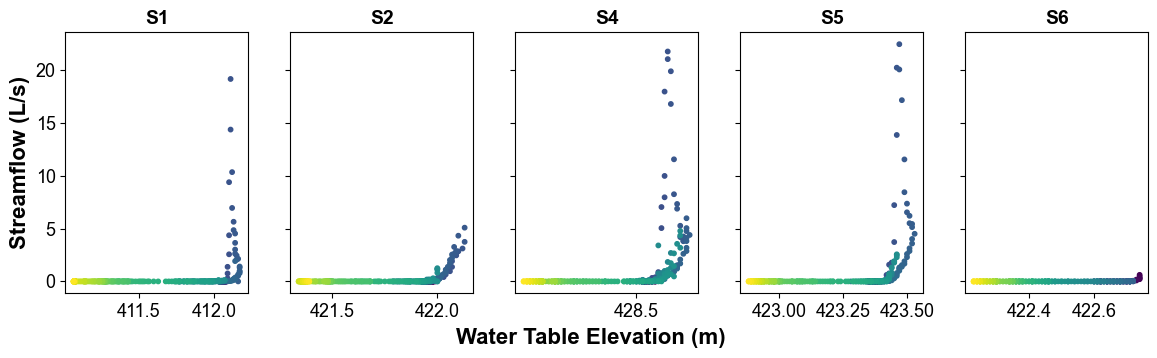

In [76]:
#Now to graph WTE vs Streamflow for 1976 to view hysteresis

from matplotlib.ticker import MultipleLocator

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 13

fig,axes=plt.subplots(nrows=1,ncols=5,figsize=(12, 3.5),sharey=True)

mask_1976=comp.index.year==1976
dates_1976=comp.loc[mask_1976].index

axes[0].scatter(comp.loc[mask_1976,'S1WTE'],comp.loc[mask_1976,'S1SF'],c=dates_num_1976,s=10, cmap='viridis')
#axes[0].set_xlabel('Water table elevation (m)', fontsize=12, font
axes[0].set_ylabel('Streamflow (L/s)', fontsize=16, fontweight='bold')
axes[0].set_title('S1',fontsize=14, fontweight='bold')
axes[1].scatter(comp.loc[mask_1976,'S2WTE'],comp.loc[mask_1976,'S2SF'],c=dates_num_1976,s=10, cmap='viridis')
#axes[1].set_xlabel('Water table elevation (m)', fontsize=12, font
axes[1].set_title('S2',fontsize=14, fontweight='bold')
axes[2].scatter(comp.loc[mask_1976,'S4WTE'],comp.loc[mask_1976,'S4SF'],c=dates_num_1976,s=10, cmap='viridis')
axes[2].xaxis.set_major_locator(MultipleLocator(0.5))
#axes[2].set_xlabel('Water table elevation (m)', fontsize=12, font
#axes[2].set_ylabel('Streamflow (L/s)', fontsize=12, font
axes[2].set_title('S4',fontsize=14, fontweight='bold')
axes[3].scatter(comp.loc[mask_1976,'S5WTE'],comp.loc[mask_1976,'S5SF'],c=dates_num_1976,s=10, cmap='viridis')
#axes[3].set_xlabel('Water table elevation (m)', fontsize=12, font
#axes[3].set_ylabel('Streamflow (L/s)', fontsize=12, font
axes[3].set_title('S5',fontsize=14, fontweight='bold')
axes[4].scatter(comp.loc[mask_1976,'S6WTE'],comp.loc[mask_1976,'S6SF'],c=dates_num_1976,s=10, cmap='viridis')
#axes[4].set_xlabel('Water table elevation (m)', fontsize=12, font
#axes[4].set_ylabel('Streamflow (L/s)', fontsize=12, font
axes[4].set_title('S6',fontsize=14, fontweight='bold')
fig.text(0.5, 0.04, 'Water Table Elevation (m)', ha='center', fontsize=16, fontweight='bold')
#plt.suptitle('Threshold Behavior in Streamflow Response to Water Table Elevation (1976)', fontweight='bold', fontsize=18)
plt.tight_layout(rect=[0, 0.05, 1, 1.05])
plt.show()
